In [1]:
#Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\AI\BAI-3A\PAI\Project\Breast Cancer Prediction\data.csv')

In [2]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.shape

(569, 32)

In [4]:
print('Description:')
cases = len(data)
print('There are {} cases in this dataset'.format(cases))
features = data.shape[1]-1
print('There are {} features in this dataset'.format(features))
malignant = len(data[data['diagnosis']=='M'])
print('There are {} cases diagnosed as malignant tumor'.format(malignant))
benign = len(data[data['diagnosis']=='B'])
print('There are {} cases diagnosed as benign tumor'.format(benign))
mrate = round(malignant / cases * 100, 4)
print('The percentage of malignant cases is: {} %'.format(mrate))
brate = round(benign / cases * 100, 4)
print('The percentage of benign cases is: {} %'.format(brate))

Description:
There are 569 cases in this dataset
There are 31 features in this dataset
There are 212 cases diagnosed as malignant tumor
There are 357 cases diagnosed as benign tumor
The percentage of malignant cases is: 37.2583 %
The percentage of benign cases is: 62.7417 %


In [5]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [6]:
data = data.drop(columns=['id'])

In [7]:
data.isnull().values.any()

False

In [8]:
x = data[data.columns[1:30]]
y = data[data.columns[0:1]]
print('Independent variable: ', x)
print('Dependent variable: ', y)

Independent variable:       radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  c

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

t_size = 0.20
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=t_size,random_state=seed)
print('x train data:', x_train)
print('y train data:', y_train)
print('x test data:', x_test)
print('y test data:', y_test)

x train data:      radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
40        13.440         21.58           86.18      563.0          0.08162   
375       16.170         16.07          106.30      788.5          0.09880   
159       10.900         12.96           68.69      366.8          0.07515   
278       13.590         17.84           86.24      572.3          0.07948   
303       10.490         18.61           66.86      334.3          0.10680   
..           ...           ...             ...        ...              ...   
211       11.840         18.94           75.51      428.0          0.08871   
502       12.540         16.32           81.25      476.3          0.11580   
537       11.690         24.44           76.37      406.4          0.12360   
196       13.770         22.29           90.63      588.9          0.12000   
175        8.671         14.45           54.42      227.2          0.09138   

     compactness_mean  concavity_mean  concave po

In [10]:
#K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knnpredictions = knn.predict(x_test)
knnScore = accuracy_score(y_test, knnpredictions)
print('Accuracy of K-Nearest Neighbor: ',knnScore)

Accuracy of K-Nearest Neighbor:  0.9122807017543859


In [11]:
print('K-nearest neighbors:\n',(classification_report(y_test, knnpredictions)))
knnCM = confusion_matrix(y_test, knnpredictions)

K-nearest neighbors:
               precision    recall  f1-score   support

           B       0.88      1.00      0.94        74
           M       1.00      0.75      0.86        40

    accuracy                           0.91       114
   macro avg       0.94      0.88      0.90       114
weighted avg       0.92      0.91      0.91       114



In [12]:
# Decision Tree using Entropy
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier( criterion='entropy', ccp_alpha = 0.015)
dt.fit(x_train, y_train)
dtepredictions = dt.predict(x_test)
DTEntropyScore = accuracy_score(y_test, dtepredictions)
print('Accuracy of Decision Tree using Entropy: ',DTEntropyScore)

Accuracy of Decision Tree using Entropy:  0.9385964912280702


In [13]:
print('Decision Tree using Entropy:\n',(classification_report(y_test, dtepredictions)))
DTEntropyCM = confusion_matrix(y_test, dtepredictions)

Decision Tree using Entropy:
               precision    recall  f1-score   support

           B       0.91      1.00      0.95        74
           M       1.00      0.82      0.90        40

    accuracy                           0.94       114
   macro avg       0.96      0.91      0.93       114
weighted avg       0.94      0.94      0.94       114



In [14]:
# Decision Tree using Gini Index
dt = DecisionTreeClassifier( criterion='gini', ccp_alpha = 0.015)
dt.fit(x_train, y_train)
dtgpredictions = dt.predict(x_test)
DTGiniScore = accuracy_score(y_test, dtgpredictions)
print('Accuracy of Decision Tree using Gini Index: ',DTGiniScore)

Accuracy of Decision Tree using Gini Index:  0.9385964912280702


In [15]:
print('Decision Tree using Gini Index:\n',(classification_report(y_test, dtgpredictions)))
DTGiniCM = confusion_matrix(y_test, dtgpredictions)

Decision Tree using Gini Index:
               precision    recall  f1-score   support

           B       0.92      0.99      0.95        74
           M       0.97      0.85      0.91        40

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [16]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
nbpredictions = nb.predict(x_test)
BayeScore = accuracy_score(y_test, nbpredictions)
print('Accuracy of Naive Bayes Algorithm: ',BayeScore)

Accuracy of Naive Bayes Algorithm:  0.9473684210526315


In [17]:
print('Naive Bayes:\n',(classification_report(y_test, nbpredictions)))
BayeCM = confusion_matrix(y_test, nbpredictions)

Naive Bayes:
               precision    recall  f1-score   support

           B       0.94      0.99      0.96        74
           M       0.97      0.88      0.92        40

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



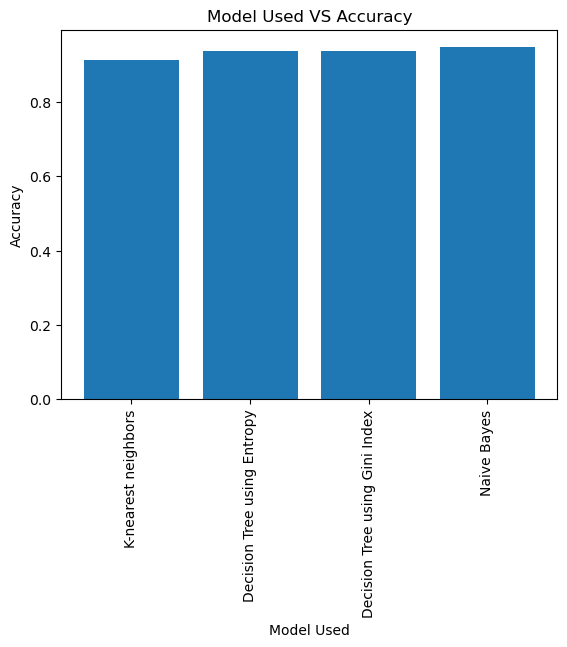

In [18]:
#Graphs Comparing the Algorithms
algo = ['K-nearest neighbors', 'Decision Tree using Entropy', 'Decision Tree using Gini Index', 'Naive Bayes']
score = [knnScore, DTEntropyScore, DTGiniScore, BayeScore]

plt.title('Model Used VS Accuracy')
plt.bar(range(len(algo)), score)

ax = plt.subplot()
ax.set_xticks(range(4))
plt.xticks(rotation=90)
ax.set_xticklabels(algo)
plt.ylabel('Accuracy')
plt.xlabel('Model Used')
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

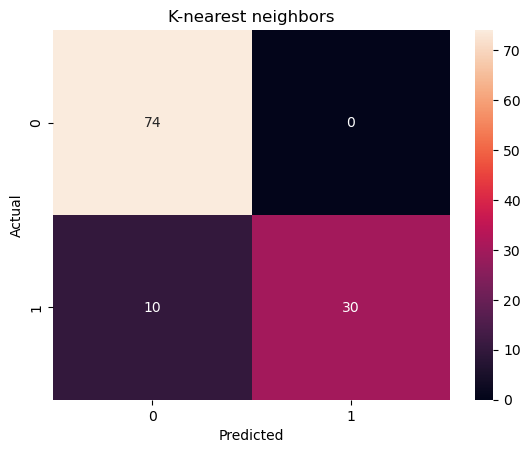

In [19]:
sns.heatmap(knnCM, annot=True)
plt.title("K-nearest neighbors")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(50.722222222222214, 0.5, 'Actual')

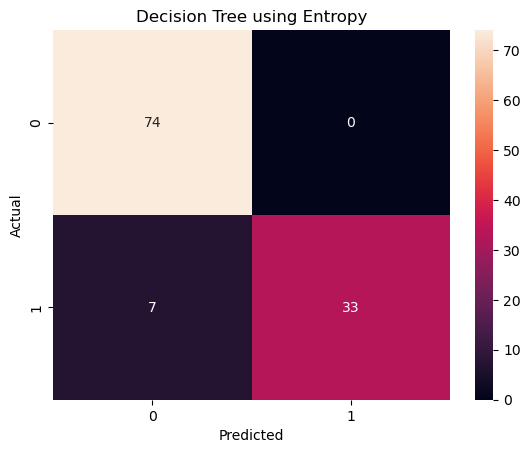

In [20]:
sns.heatmap(DTEntropyCM, annot=True)
plt.title("Decision Tree using Entropy")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(50.722222222222214, 0.5, 'Actual')

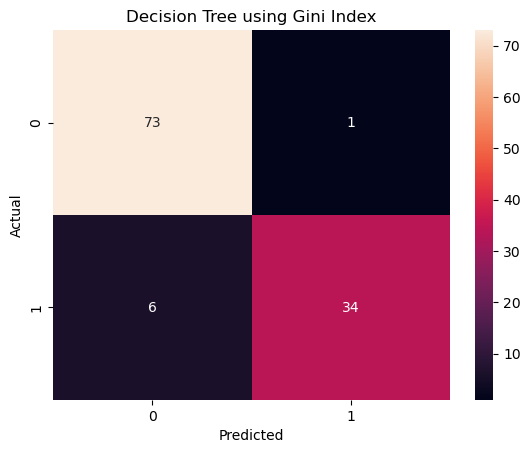

In [21]:
sns.heatmap(DTGiniCM, annot=True)
plt.title("Decision Tree using Gini Index")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Text(50.722222222222214, 0.5, 'Actual')

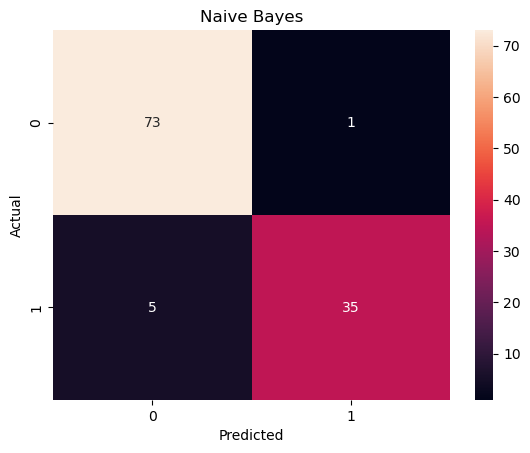

In [22]:
sns.heatmap(BayeCM, annot=True)
plt.title("Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:
#Using Naive Bayes to predict Breast Cancer 

a = float(input('Enter radius mean: '))
b = float(input('Enter texture mean: '))
c = float(input('Enter perimeter mean: '))
d = float(input('Enter area mean: '))
e = float(input('Enter smoothness mean: '))
f = float(input('Enter compactness mean: '))
g = float(input('Enter concavity mean: '))
h = float(input('Enter concave points mean: '))
i = float(input('Enter symmetry mean: '))
j = float(input('Enter fractal dimension mean: '))
k = float(input('Enter radius standard error: '))
l = float(input('Enter texture standard error: '))
m = float(input('Enter perimeter standard error: '))
n = float(input('Enter area standard error: '))
o = float(input('Enter smoothness standard error: '))
p = float(input('Enter concavity standard error: '))
q = float(input('Enter concave points standard error: '))
r = float(input('Enter symmetry standard error: '))
s = float(input('Enter fractal dimension standard error: '))
t = float(input('Enter radius worst: '))
u = float(input('Enter texture worst: '))
v = float(input('Enter perimeter worst: '))
w = float(input('Enter area worst: '))
x = float(input('Enter smoothness worst: '))
y = float(input('Enter compactness worst: '))
z = float(input('Enter concavity worst: '))
aa = float(input('Enter concave points worst: '))
bb = float(input('Enter symmetry worst: '))
cc = float(input('Enter fractal dimension worst: '))



predicted = nb.predict([[a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,aa,bb,cc]])

if predicted[0] == 'M':
    print('\nResult: Malignant Breast Cancer Found')
else:
    print('\nResult: Benign Breast Cancer Found')

Enter radius mean: 13.49
Enter texture mean: 22.3
Enter perimeter mean: 86.91
Enter area mean: 561
Enter smoothness mean: 0.08752
Enter compactness mean: 0.07698
Enter concavity mean: 0.04751
Enter concave points mean: 0.03384
Enter symmetry mean: 0.1809
Enter fractal dimension mean: 0.05718
Enter radius standard error: 0.2338
Enter texture standard error: 1.353
Enter perimeter standard error: 1.735
Enter area standard error: 20.2
Enter smoothness standard error: 0.00446
Enter concavity standard error: 0.01382
Enter concave points standard error: 0.02095
Enter symmetry standard error: 0.01184
Enter fractal dimension standard error: 0.01641
Enter radius worst: 0.00194
Enter texture worst: 15.15
Enter perimeter worst: 31.82
Enter area worst: 99
Enter smoothness worst: 698.8
Enter compactness worst: 0.1162
Enter concavity worst: 0.1711
Enter concave points worst: 0.2282
Enter symmetry worst: 0.1282
Enter fractal dimension worst: 0.2871

Result: Benign Breast Cancer Found
